In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import warnings
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds=xr.open_mfdataset(
    '/g/data/oe9/user/rg6346/VI_mask_nc/NDVI/NDVI_????.nc',
    chunks=dict(long=176)) 
ds=ds.rename({'ndvi_evi':'ndvi'})
ds=ds.drop('band')
ds['ndvi']=ds.ndvi/10000;
ds

<xarray.Dataset>
Dimensions:  (lat: 3147, long: 3344, time: 388)
Coordinates:
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...
  * time     (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Data variables:
    ndvi     (time, lat, long) float64 dask.array<shape=(388, 3147, 3344), chunksize=(20, 3147, 176)>

In [3]:
sub=ds.sel(lat=slice(-30.1, -31),long=slice(148.9,150.6)) ##yarrie
sub.load()

<xarray.Dataset>
Dimensions:  (lat: 216, long: 408, time: 388)
Coordinates:
  * lat      (lat) float64 -30.1 -30.11 -30.11 -30.11 -30.12 -30.12 -30.13 ...
  * long     (long) float64 148.9 148.9 148.9 148.9 148.9 148.9 148.9 148.9 ...
  * time     (time) datetime64[ns] 2000-02-18 2000-03-05 2000-03-21 ...
Data variables:
    ndvi     (time, lat, long) float64 0.3499 0.3152 0.2693 0.2616 0.2476 ...

In [27]:
drought=ds.sel(time=slice(None,'2009'))
after=ds.sel(time=slice('2010',None))

In [28]:
mean_ndvi_anomaly=after.ndvi.mean(dim='time')-drought.ndvi.mean(dim='time')
mean_ndvi_anomaly

<xarray.DataArray 'ndvi' (lat: 3147, long: 3344)>
dask.array<shape=(3147, 3344), dtype=float64, chunksize=(3147, 176)>
Coordinates:
  * lat      (lat) float64 -24.59 -24.59 -24.6 -24.6 -24.6 -24.61 -24.61 ...
  * long     (long) float64 138.6 138.6 138.6 138.6 138.6 138.6 138.6 138.6 ...

/g/data/oe9/software/anaconda/envs/geo/lib/python3.6/site-packages/dask/array/numpy_compat.py:48: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


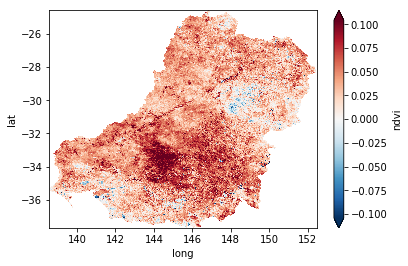

In [29]:
mean_ndvi_anomaly.plot.imshow(robust=True)